### Here we perform the data cleaning 

In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns,warnings

from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv("Social_Network_Ads_Altered.csv")
df.sample(8)

,User ID,Gender,Age,EstimatedSalary,Purchased
205,15766609,Female,NaN,47000.0,0.0
347,15768151,Female,54.0,108000.0,1.0
292,15625395,Male,55.0,39000.0,1.0
120,15811613,Female,36.0,75000.0,0.0
235,15646227,Male,46.0,79000.0,1.0
78,15667265,Female,28.0,87000.0,0.0
12,15746139,NaN,20.0,86000.0,0.0
309,15652400,Female,38.0,50000.0,0.0


## Data Cleaning --> EDA --> Feature Engineering   

In [3]:
# how do we find the null values in the Data Frame 

df.isnull().sum()

User ID             0
Gender             16
Age                23
EstimatedSalary     2
Purchased           1
dtype: int64

In [4]:
# Percentage of Values --> in the DF

(df.isnull().sum() / len(df)) * 100

# lets do a basic math --> in 400 --> 10% means --> 40 --> 5% means 20 rows 

User ID            0.00
Gender             4.00
Age                5.75
EstimatedSalary    0.50
Purchased          0.25
dtype: float64

In [5]:
df.shape 

(400, 5)

In [6]:
# dropping all the Rows with NAN Values --> Method - 1 -->  ( when u have more data) --> (CCA)

# df = df.dropna()

In [7]:
# Method -2 (Limited Data ) >> you do not 

df.dropna(subset={'Gender','Purchased','EstimatedSalary'},inplace=True)

In [8]:
df.isnull().sum() 

User ID             0
Gender              0
Age                23
EstimatedSalary     0
Purchased           0
dtype: int64

In [9]:
# impute or fill the NAN values with mean ,median,arbitary value, End of Distribution  .... etc ! 
# Ways to impute the NAN values 1) Pandas 2) Scikitlearn

In [10]:
mean =np.round(df['Age'].mean(),0)
mean

38.0

In [11]:
df['Age'] = df['Age'].fillna(mean)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          381 non-null    int64  
 1   Gender           381 non-null    object 
 2   Age              381 non-null    float64
 3   EstimatedSalary  381 non-null    float64
 4   Purchased        381 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 17.9+ KB


### Outlier's Detection 

In [13]:
X = df.iloc[:,:4]
y = df.Purchased

In [14]:
X.head()

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19.0,19000.0
1,15810944,Male,35.0,20000.0
2,15668575,Female,26.0,43000.0
3,15603246,Female,27.0,57000.0
4,15804002,Male,19.0,76000.0


In [15]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Purchased, dtype: float64

In [16]:
int_columns = X.select_dtypes('float64')
int_columns

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


<Axes: >

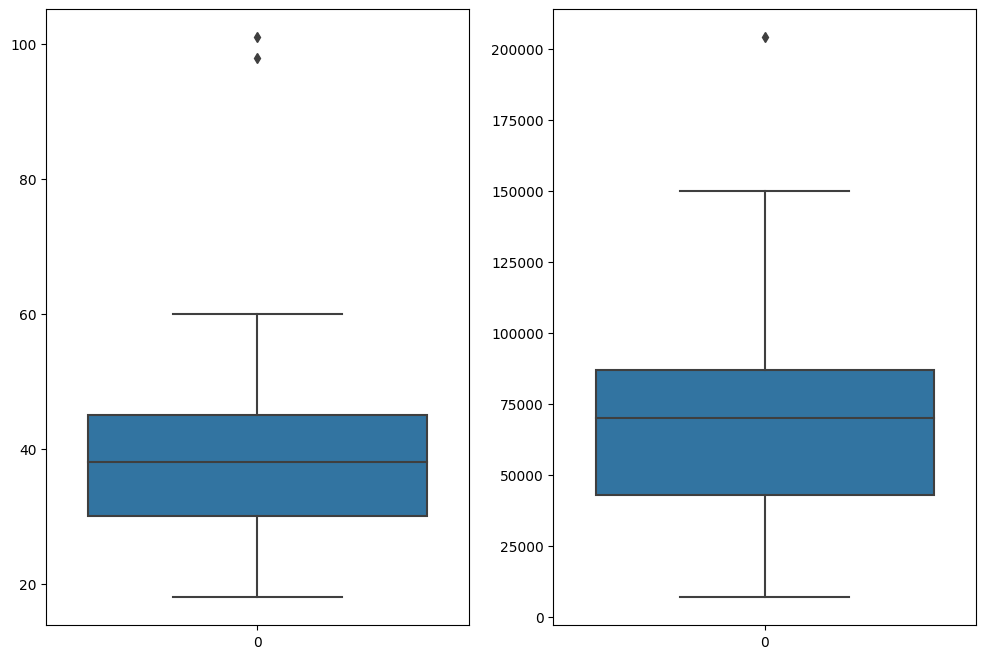

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(X['Age'])
plt.subplot(1,2,2)
sns.boxplot(X['EstimatedSalary'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

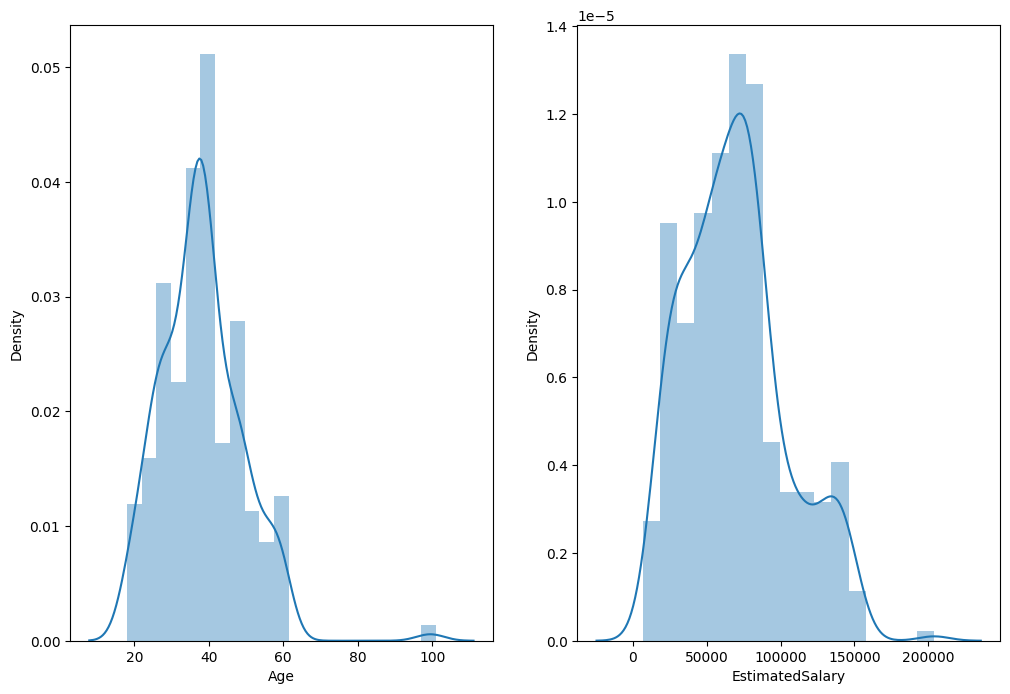

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.distplot(X['Age'])
plt.subplot(1,2,2)
sns.distplot(X['EstimatedSalary'])

## Feature Engineering 
* Feature Construction 

* Feature Encoding 

* Feature Scaling 

* Feature Extraction 

##### Feature Construction --> This Technique is preferred when you  have some Domain Knowledge related to the Data your working with 

In [19]:
# Feature Construction --> 
titanic_df = pd.read_csv("Titanic-Dataset.csv")
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic_df.shape

(891, 12)

In [21]:
titanic_df['Family'] = titanic_df.SibSp + titanic_df.Parch 
titanic_df.sample(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S,6
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q,1
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,0
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S,0
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S,0
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,0
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,0
620,621,0,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,1


In [22]:
titanic_df.shape

(891, 13)

In [23]:
# Dropping the Un-Necessary Columns 

titanic_df.drop(columns=['SibSp','Parch'],inplace=True)
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [24]:
titanic_df.shape

(891, 11)

### Feature Encoding 
* Ordinal Encoding 
* Nominal Encoding / One Hot Encoding  --> Scikit Learn (or) Pandas 
* Label Encoding 

In [26]:
Customer_df = pd.read_csv('customer.csv')
Customer_df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [47]:
X = Customer_df.iloc[:,:4]
Y = Customer_df.purchased

In [48]:
print(X.head())
print("*" * 80)
print(Y.head())

   age  gender   review education
0   30  Female  Average    School
1   68  Female     Poor        UG
2   70  Female     Good        PG
3   72  Female     Good        PG
4   16  Female  Average        UG
********************************************************************************
0    No
1    No
2    No
3    No
4    No
Name: purchased, dtype: object


In [50]:
print(X['review'].unique())
print(X['education'].unique())
print(X['gender'].unique())

['Average' 'Poor' 'Good']
['School' 'UG' 'PG']
['Female' 'Male']


In [51]:
Customer_df['purchased'].unique() 

array(['No', 'Yes'], dtype=object)

In [52]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [58]:
trf = ColumnTransformer(transformers=[
    ('Ohe-Encoding',OneHotEncoder(sparse=False,drop='first'),['gender']),
    ('ordinal-Encoding-review',OrdinalEncoder(categories=[['Poor','Average','Good']]),['review']),
    ('ordinal-Encoding-education',OrdinalEncoder(categories=[['School','UG','PG']]),['education']),
],remainder='passthrough')

In [59]:
X_Encoded = trf.fit_transform(X)
X_Encoded

array([[ 0.,  1.,  0., 30.],
       [ 0.,  0.,  1., 68.],
       [ 0.,  2.,  2., 70.],
       [ 0.,  2.,  2., 72.],
       [ 0.,  1.,  1., 16.],
       [ 0.,  1.,  0., 31.],
       [ 1.,  2.,  0., 18.],
       [ 0.,  0.,  0., 60.],
       [ 0.,  1.,  1., 65.],
       [ 1.,  2.,  1., 74.],
       [ 0.,  2.,  1., 98.],
       [ 1.,  2.,  1., 74.],
       [ 1.,  0.,  0., 51.],
       [ 0.,  1.,  0., 57.],
       [ 1.,  0.,  2., 15.],
       [ 1.,  0.,  1., 75.],
       [ 1.,  0.,  1., 59.],
       [ 0.,  0.,  1., 22.],
       [ 1.,  2.,  0., 19.],
       [ 1.,  0.,  2., 97.],
       [ 0.,  1.,  0., 57.],
       [ 1.,  1.,  2., 32.],
       [ 0.,  0.,  2., 18.],
       [ 0.,  2.,  0., 96.],
       [ 0.,  1.,  2., 16.],
       [ 0.,  2.,  0., 57.],
       [ 0.,  0.,  2., 53.],
       [ 0.,  0.,  2., 69.],
       [ 1.,  0.,  0., 48.],
       [ 0.,  1.,  1., 83.],
       [ 1.,  1.,  1., 73.],
       [ 0.,  0.,  0., 22.],
       [ 1.,  1.,  1., 92.],
       [ 0.,  2.,  2., 89.],
       [ 1.,  

In [62]:
X_df = pd.DataFrame(data = X_Encoded,columns=['Gender','Review','Education','Age'])
X_df.head()

,Gender,Review,Education,Age
0,0.0,1.0,0.0,30.0
1,0.0,0.0,1.0,68.0
2,0.0,2.0,2.0,70.0
3,0.0,2.0,2.0,72.0
4,0.0,1.0,1.0,16.0


In [63]:
## Label Encoding  --> Mostly prefered for encoding the target columns 
label_encoder = LabelEncoder()

Y_encoded = label_encoder.fit_transform(Y)

Y_encoded

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0])

## Featur Scaling 
* Standardization / __Standard Scaler__


In [93]:
data = pd.read_csv('Social_Network_Ads.csv')

data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [95]:
data = data.drop(columns=['User ID','Gender'])
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Purchased']), data['Purchased'], test_size=0.2, random_state=24)


In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
X_train_scaled_df = pd.DataFrame(data = X_train_scaled,columns=X_train.columns)

X_test_scaled_df = pd.DataFrame(data = X_test_scaled,columns=X_test.columns)

In [100]:
X_train_scaled_df.head()

,Age,EstimatedSalary
0,-1.611643,0.086333
1,0.689848,-1.301022
2,2.032384,0.418091
3,0.018580,-0.245426
4,-0.269107,0.176812


In [101]:
X_train.describe()

,Age,EstimatedSalary
count,320.000000,320.00000
mean,37.806250,69137.50000
std,10.444357,33208.56246
min,18.000000,15000.00000
25%,30.000000,43000.00000
50%,37.000000,69500.00000
75%,46.000000,88000.00000
max,60.000000,150000.00000


In [102]:
X_train_scaled_df.describe()

,Age,EstimatedSalary
count,3.200000e+02,3.200000e+02
mean,1.332268e-16,1.387779e-17
std,1.001566e+00,1.001566e+00
min,-1.899329e+00,-1.632780e+00
25%,-7.485837e-01,-7.883038e-01
50%,-7.731569e-02,1.093296e-02
75%,7.857432e-01,5.688907e-01
max,2.128279e+00,2.438803e+00


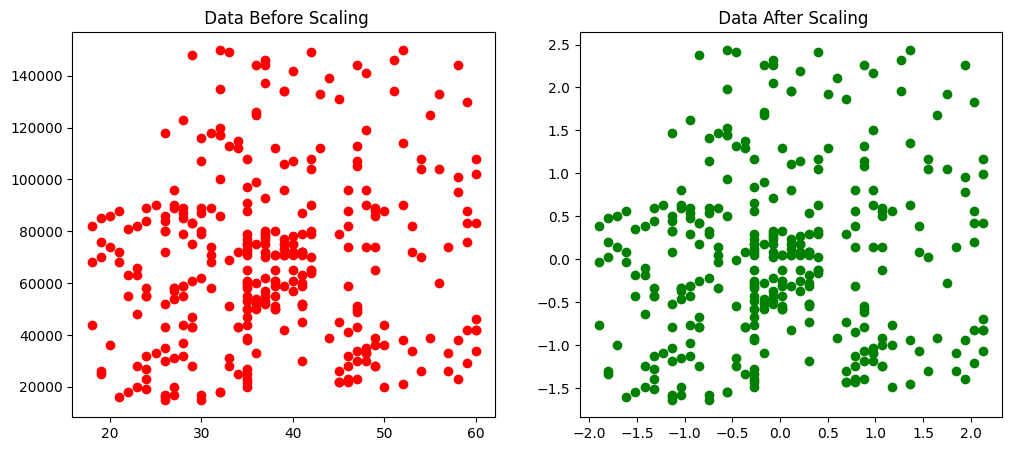

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color='red')
ax1.set_title(' Data Before Scaling')
ax2.scatter(X_train_scaled_df['Age'],X_train_scaled_df['EstimatedSalary'],color='green')
ax2.set_title(' Data After Scaling')
plt.show()

Text(0.5, 1.0, 'Data After Scaling')

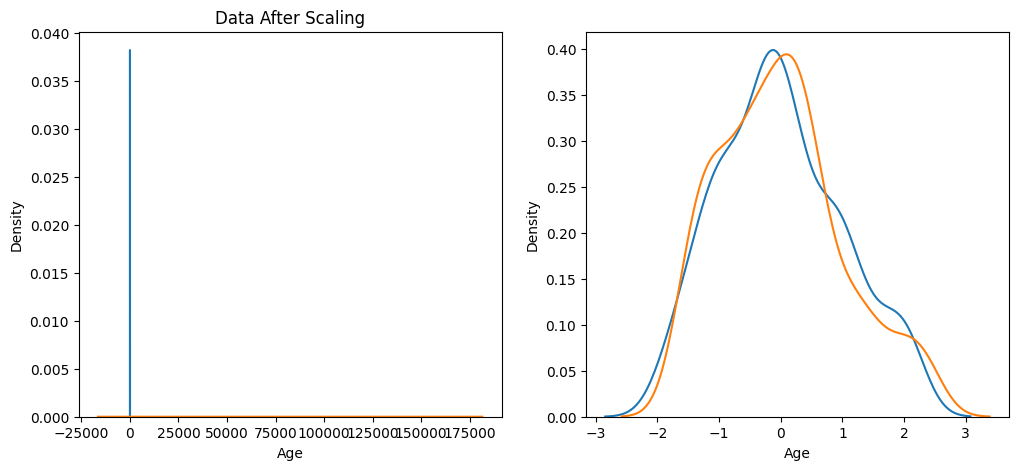

In [104]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title('Data Before Scaling')
sns.kdeplot(X_train_scaled_df['Age'],ax=ax2)
sns.kdeplot(X_train_scaled_df['EstimatedSalary'],ax=ax2)
ax1.set_title('Data After Scaling')

* Normalization  /  __Minmax Scaler__

In [112]:
wine_df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
column=['Class label', 'Alcohol', 'Malic acid']
wine_df.columns = column
wine_df 

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)


In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [116]:
X_train.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [117]:
X_train_scaled.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


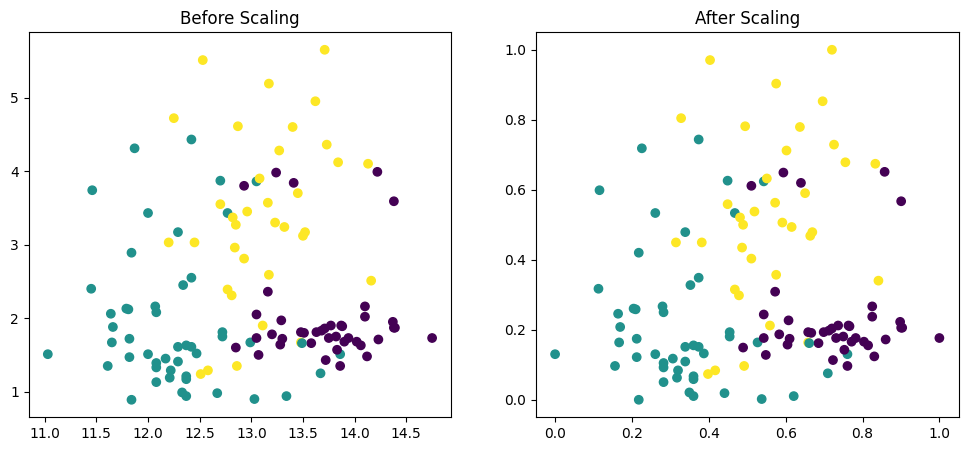

In [118]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

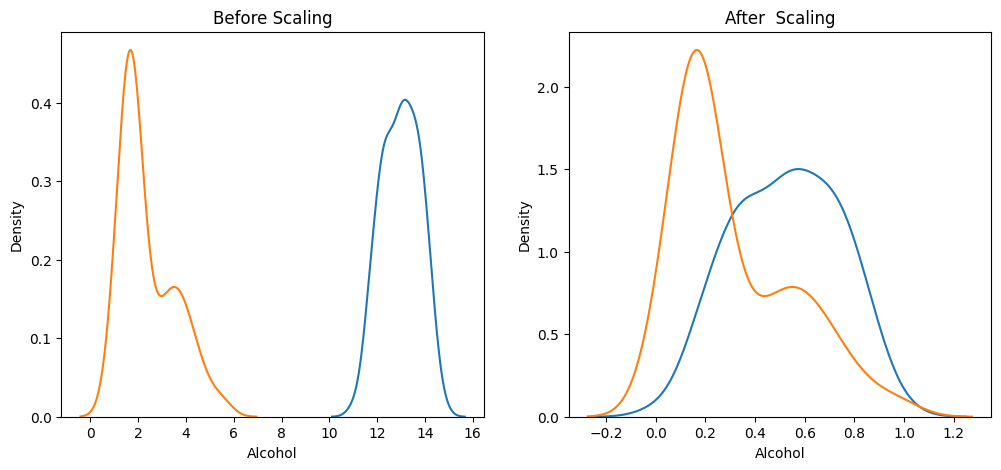

In [120]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After  Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()